# 1. Find missing values (*)

  a) Read in the file "student-mat-missing-data.csv" into a Pandas DataFrame

  b) Do some initial explorations with the methods to get an understanding of the dataset:

> head(), info(), describe(), value_counts(), unique(), columns()

  c) Create a function that takes in a DataFrame as input parameter and plots a barplot with the columns that have missing values. Put this function into a file called data_utils.py. When you come across more useful functions, you can store them in your data_utils module.

  d) Now import your function from the module data_utils and use it to visualize NaNs in your dataset.

  e) Find all rows where the freetime is NaN.

  f) Find all rows where the freetime or the age is NaN.

  g) You will notice that some rows have several NaNs. Now compute the proportion that these rows constitute of the whole dataset.

,age,famrel,freetime,goout,health,absences
count,381.000000,390.000000,379.000000,390.000000,390.000000,390.000000
mean,16.700787,3.943590,3.237467,3.120513,3.548718,5.569231
std,1.275157,0.896665,0.990201,1.112370,1.394604,7.232395
min,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,4.000000,3.000000,2.000000,3.000000,0.000000
50%,17.000000,4.000000,3.000000,3.000000,4.000000,4.000000
75%,18.000000,5.000000,4.000000,4.000000,5.000000,8.000000
max,22.000000,5.000000,5.000000,5.000000,5.000000,56.000000


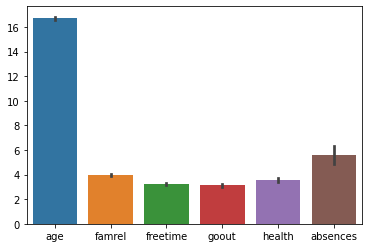

In [20]:
import pandas as pd
import seaborn as sns
import data_utils as du

df_student_rawdata = pd.read_csv('../data/student-mat-missing-data.csv')

# columnes:
# ['Unnamed: 0', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
#       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
#       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
#       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
#       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

#df_student_rawdata["famsup"].unique()
#df_student_rawdata.describe()
# drop "Unnamed: 0", just indeces

df_student = du.extract_nan_columns(df_student_rawdata)
df_student.describe()




In [ ]:
#   e) Find all rows where the freetime is NaN.
#

#df_student.

#  f) Find all rows where the freetime or the age is NaN.
#
#  g) You will notice that some rows have several NaNs. Now compute the proportion that these rows constitute of the whole dataset.